In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
ice = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/CEEN%20UDD%20ICE.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
ice.columns = ['ice', 'ice-m3', 'ice-agricola', 'ice-comercio', 'ice-construccion', 'ice-financiero', 'ice-industria', 'ice-mineria']
ice = ice.drop('ice-m3', axis=1)
ice.head()

,ice,ice-agricola,ice-comercio,ice-construccion,ice-financiero,ice-industria,ice-mineria
Fecha,,,,,,,
2003-07-01,7.971904,NaN,19.097858,2.386364,NaN,15.541883,NaN
2003-10-01,22.718816,NaN,14.247523,36.945946,NaN,33.071089,47.222222
2004-01-01,20.812355,NaN,16.293667,35.214490,NaN,27.078442,44.097222
2004-04-01,9.815389,NaN,19.497714,20.705923,NaN,7.643601,11.313657
2004-07-01,5.779183,NaN,7.686528,25.413223,NaN,-3.052662,14.131944


In [3]:
imce = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/ICARE%20UAI%20IMCE.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
imce.columns = ['imce-comercio', 'imce-construccion', 'imce-industria', 'imce-mineria', 'imce', 'imce-sin_mineria']
imce = imce.drop('imce-sin_mineria', axis=1)
imce.head()

,imce-comercio,imce-construccion,imce-industria,imce-mineria,imce
Fecha,,,,,
2003-11-01,65.921791,41.911766,53.008423,65.081902,56.497246
2003-12-01,64.728683,55.277779,51.500000,68.794701,58.797302
2004-01-01,65.833336,53.488373,57.048748,73.417030,61.696945
2004-02-01,67.515923,51.879700,57.096355,77.637482,62.639008
2004-03-01,65.062386,53.030304,57.770962,75.836113,62.145172


In [4]:
data = pd.concat([ice, imce], axis=1)
data = data.interpolate(method='linear', limit_area='inside')
data = data['2003-11':]

In [5]:
data = (data - data.mean()) / data.std()

In [6]:
corr_mat = data.corr().loc[['ice', 'ice-comercio', 'ice-construccion', 'ice-industria', 'ice-mineria', 'ice-agricola', 'ice-financiero']][['imce', 'imce-comercio', 'imce-construccion', 'imce-industria', 'imce-mineria']]
corr_mat

,imce,imce-comercio,imce-construccion,imce-industria,imce-mineria
ice,0.888119,0.907077,0.806408,0.862648,0.368455
ice-comercio,0.586192,0.618078,0.478403,0.608033,0.248745
ice-construccion,0.727512,0.780364,0.685788,0.692489,0.229218
ice-industria,0.635379,0.646383,0.567808,0.656766,0.214592
ice-mineria,0.650079,0.702106,0.576463,0.610575,0.279832
ice-agricola,0.554120,0.608694,0.435762,0.557912,0.233758
ice-financiero,0.664357,0.747168,0.592329,0.564714,0.315422


<AxesSubplot:>

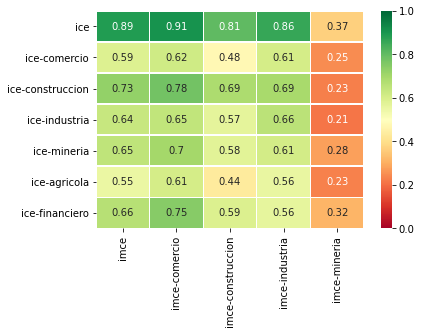

In [7]:
fig, ax =plt.subplots()
sns.heatmap(corr_mat, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=0, vmax=1)

In [8]:
indices = data[['ice', 'imce']]

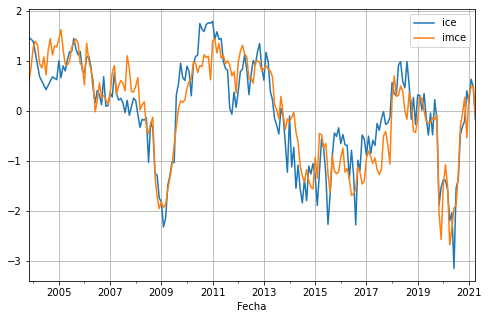

In [9]:
indices.plot(linewidth=1.5, figsize=(8,5))
plt.grid()

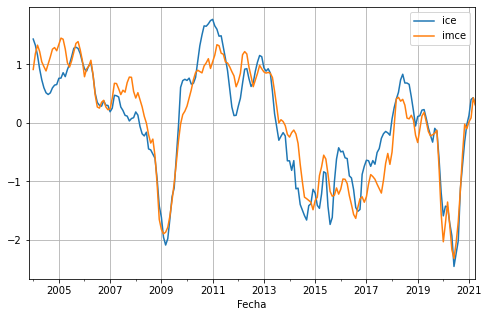

In [10]:
indices3 = indices.rolling(3).mean()
indices3.plot(linewidth=1.5, figsize=(8,5))
plt.grid()

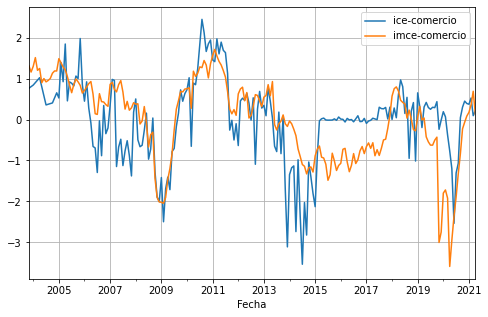

In [11]:
data[['ice-comercio', 'imce-comercio']].plot(linewidth=1.5, figsize=(8,5))
plt.grid()

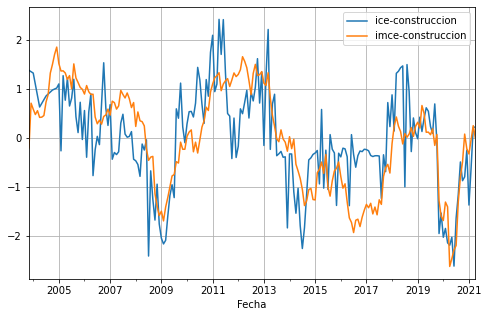

In [12]:
data[['ice-construccion', 'imce-construccion']].plot(linewidth=1.5, figsize=(8,5))
plt.grid()

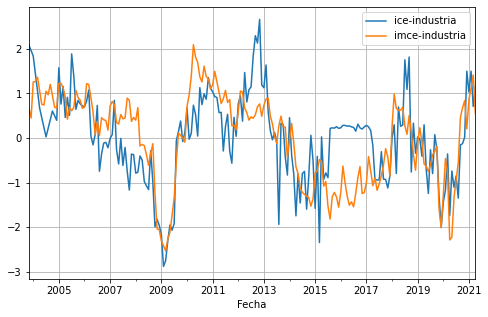

In [13]:
data[['ice-industria', 'imce-industria']].plot(linewidth=1.5, figsize=(8,5))
plt.grid()

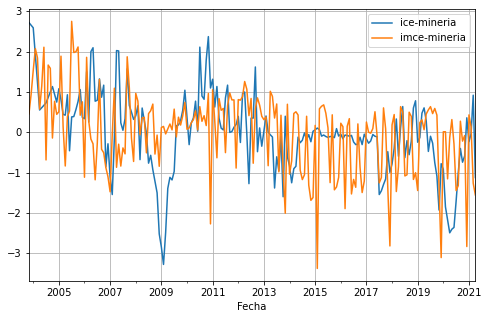

In [14]:
data[['ice-mineria', 'imce-mineria']].plot(linewidth=1.5, figsize=(8,5))
plt.grid()